In [1]:
from cifar10_example import *

In [2]:
teacher = Model(build_teacher_model, "cifar10_teacher", fn_compile)
teacher.load()

In [3]:
xd,yd,xt,yt = load_data()
BATCH = 128
EPOCH = 30

In [4]:
#(loss, acc) = teacher.model.evaluate(xt,yt,batch_size=128)
(loss, acc) = (0.44668698687553404, 0.9359) # pre calculated


In [5]:
student = Model(build_student_model, "cifar10_student", fn_compile)
callbacks = [keras.callbacks.TensorBoard('logs')]
h2 = student.train(xd,yd,BATCH,EPOCH,callbacks,(xt,yt))

student.save()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 100s 2ms/step - loss: 1.3364 - acc: 0.5214 - val_loss: 1.0224 - val_acc: 0.6395
Epoch 2/30
50000/50000 [==============================] - 146s 3ms/step - loss: 0.8985 - acc: 0.6868 - val_loss: 0.8558 - val_acc: 0.7047
Epoch 3/30
50000/50000 [==============================] - 133s 3ms/step - loss: 0.7256 - acc: 0.7489 - val_loss: 0.8525 - val_acc: 0.7138
Epoch 4/30
50000/50000 [==============================] - 132s 3ms/step - loss: 0.6054 - acc: 0.7907 - val_loss: 0.7277 - val_acc: 0.7487
Epoch 5/30
50000/50000 [==============================] - 107s 2ms/step - loss: 0.5062 - acc: 0.8250 - val_loss: 0.8071 - val_acc: 0.7358
Epoch 6/30
50000/50000 [==============================] - 111s 2ms/step - loss: 0.4229 - acc: 0.8514 - val_loss: 0.7499 - val_acc: 0.7570
Epoch 7/30
50000/50000 [==============================] - 111s 2ms/step - loss: 0.3381 - acc: 0.8823 - val_loss: 0.7569 - 

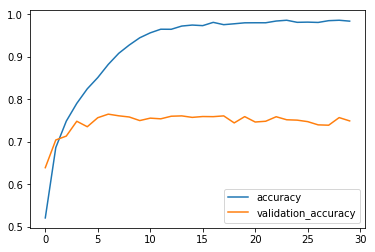

In [6]:
plt.plot(h2.history['acc'], label='accuracy')
plt.plot(h2.history['val_acc'], label='validation_accuracy')
plt.legend()

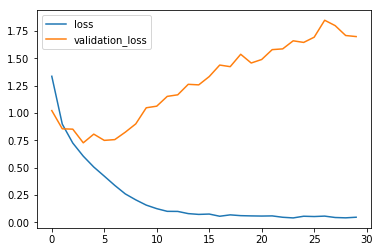

In [7]:
plt.plot(h2.history['loss'], label='loss')
plt.plot(h2.history['val_loss'], label='validation_loss')
plt.legend()

In [8]:
student2 = Model(build_student_model, "cifar10_student2", fn_compile)
yd = np.load("datasets/cifar10preprocessed/train_y.npy")
yt = np.load("datasets/cifar10preprocessed/test_y.npy")

In [9]:
distill = Distill(teacher, student2, 10, 5.0, 0.07)
h3 = distill.teach(xd, yd, BATCH, EPOCH, callbacks, (xt,yt), pre_processed=True)
student2.save()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 113s 2ms/step - loss: 2.1811 - accuracy: 0.5150 - top_5_accuracy: 0.9233 - categorical_crossentropy: 1.4595 - soft_logloss: 2.0790 - val_loss: 2.0800 - val_accuracy: 0.6357 - val_top_5_accuracy: 0.9652 - val_categorical_crossentropy: 1.1189 - val_soft_logloss: 2.0017
Epoch 2/30
50000/50000 [==============================] - 111s 2ms/step - loss: 2.0361 - accuracy: 0.6857 - top_5_accuracy: 0.9742 - categorical_crossentropy: 0.9918 - soft_logloss: 1.9666 - val_loss: 2.0121 - val_accuracy: 0.7098 - val_top_5_accuracy: 0.9780 - val_categorical_crossentropy: 0.9077 - val_soft_logloss: 1.9486
Epoch 3/30
50000/50000 [==============================] - 112s 2ms/step - loss: 1.9788 - accuracy: 0.7488 - top_5_accuracy: 0.9830 - categorical_crossentropy: 0.7961 - soft_logloss: 1.9231 - val_loss: 1.9810 - val_accuracy: 0.7419 - val_top_5_accuracy: 0.9822 - val_categorical_crossentropy: 0.8613

Epoch 26/30
50000/50000 [==============================] - 106s 2ms/step - loss: 1.7455 - accuracy: 0.9998 - top_5_accuracy: 1.0000 - categorical_crossentropy: 0.0042 - soft_logloss: 1.7452 - val_loss: 1.9564 - val_accuracy: 0.7800 - val_top_5_accuracy: 0.9810 - val_categorical_crossentropy: 0.8927 - val_soft_logloss: 1.8939
Epoch 27/30
50000/50000 [==============================] - 109s 2ms/step - loss: 1.7444 - accuracy: 0.9996 - top_5_accuracy: 1.0000 - categorical_crossentropy: 0.0042 - soft_logloss: 1.7441 - val_loss: 1.9574 - val_accuracy: 0.7786 - val_top_5_accuracy: 0.9806 - val_categorical_crossentropy: 0.8935 - val_soft_logloss: 1.8948
Epoch 28/30
50000/50000 [==============================] - 142s 3ms/step - loss: 1.7430 - accuracy: 0.9998 - top_5_accuracy: 1.0000 - categorical_crossentropy: 0.0035 - soft_logloss: 1.7427 - val_loss: 1.9587 - val_accuracy: 0.7835 - val_top_5_accuracy: 0.9790 - val_categorical_crossentropy: 0.8917 - val_soft_logloss: 1.8963
Epoch 29/30
50000/5

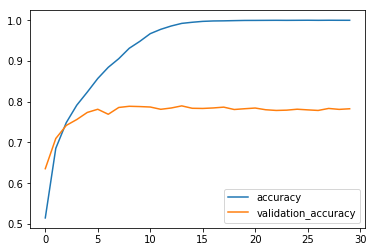

In [10]:
plt.plot(h3.history['accuracy'], label='accuracy')
plt.plot(h3.history['val_accuracy'], label='validation_accuracy')
plt.legend()

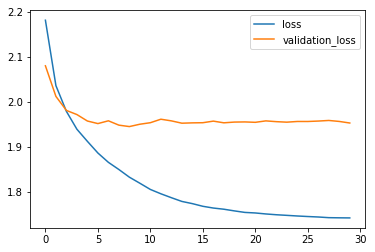

In [11]:
plt.plot(h3.history['loss'], label='loss')
plt.plot(h3.history['val_loss'], label='validation_loss')
plt.legend()

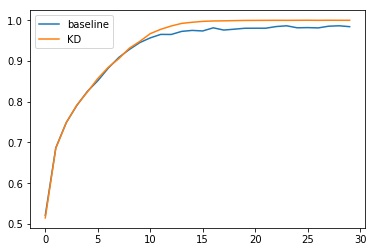

In [12]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.legend()

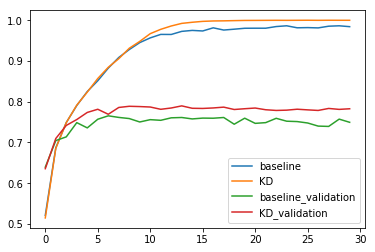

In [13]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.plot(h2.history['val_acc'], label='baseline_validation')
plt.plot(h3.history['val_accuracy'], label='KD_validation')
plt.legend()

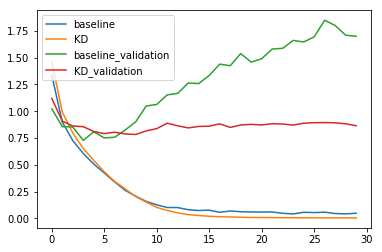

In [14]:
plt.plot(h2.history['loss'], label='baseline')
plt.plot(h3.history['categorical_crossentropy'], label='KD')
plt.plot(h2.history['val_loss'], label='baseline_validation')
plt.plot(h3.history['val_categorical_crossentropy'], label='KD_validation')
plt.legend()

In [15]:
for key in h2.history.keys():
    print(key)
    print(h2.history[key])

val_loss
[1.0224172607421875, 0.8558280162811279, 0.8525294137954712, 0.7277084476947785, 0.8071026118278504, 0.7499351045608521, 0.7569459535598755, 0.8247195168495178, 0.9007138578414917, 1.0481739894866944, 1.0628968379974366, 1.1523983625411987, 1.166720648956299, 1.2627604043960572, 1.2577280195236207, 1.3335242066383362, 1.4390030670166016, 1.4242209354400635, 1.5375874221801757, 1.4576207624435424, 1.4898658100128175, 1.580085033416748, 1.5869048559188843, 1.6606906047821044, 1.6460534809112548, 1.6937188930511475, 1.8488980764389038, 1.7996333104133606, 1.7092593658447266, 1.699497310256958]
val_acc
[0.6395, 0.7047, 0.7138, 0.7487, 0.7358, 0.757, 0.7654, 0.7615, 0.7587, 0.7503, 0.756, 0.7544, 0.7605, 0.7613, 0.7578, 0.7598, 0.7595, 0.7613, 0.7448, 0.7596, 0.7469, 0.7487, 0.7593, 0.7522, 0.7513, 0.7478, 0.7402, 0.7394, 0.7573, 0.7495]
loss
[1.3363584651947022, 0.898483895740509, 0.7255511393547058, 0.6054321142959594, 0.5061941801261902, 0.422872735042572, 0.3381398301506042, 0.

In [16]:
for key in h3.history.keys():
    print(key)
    print(h3.history[key])

val_loss
[2.080003478240967, 2.012108247375488, 1.9809709527969361, 1.9717801181793213, 1.9574518577575684, 1.9517619766235352, 1.9579281017303467, 1.9482905220031739, 1.9451303253173828, 1.9503472324371338, 1.9537096559524536, 1.9614636714935303, 1.9577950252532959, 1.9526263547897338, 1.9533496551513672, 1.9536954778671265, 1.9572124917984008, 1.9534739755630492, 1.9550991519927978, 1.9554443325042725, 1.9545630775451661, 1.9577494392395018, 1.9560419883728026, 1.9549031538009645, 1.9564496437072754, 1.9564207702636718, 1.9573631118774415, 1.9587026859283447, 1.9565024095535277, 1.953036923599243]
val_accuracy
[0.6357, 0.7098, 0.7419, 0.7563, 0.7737, 0.7815, 0.7692, 0.7859, 0.7888, 0.7881, 0.787, 0.7814, 0.7846, 0.7898, 0.7839, 0.7835, 0.7847, 0.7867, 0.7809, 0.7828, 0.7845, 0.7803, 0.7786, 0.7793, 0.7816, 0.78, 0.7786, 0.7835, 0.7812, 0.7827]
val_top_5_accuracy
[0.9652, 0.978, 0.9822, 0.9835, 0.9846, 0.9842, 0.9825, 0.9847, 0.9843, 0.9846, 0.9846, 0.9822, 0.9805, 0.9837, 0.9805, 0.9